# Comparison Plots
### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from src.config.plot_settings import beautify_plot, apply_global_plot_settings

### HHCART D Models
The cell below plots the coverage vs density of the 4 best hhcart models with 2 to 5 features ran on the data.

Figure saved: data/comparison/coverage_density_hhcart_d_comparison.pdf


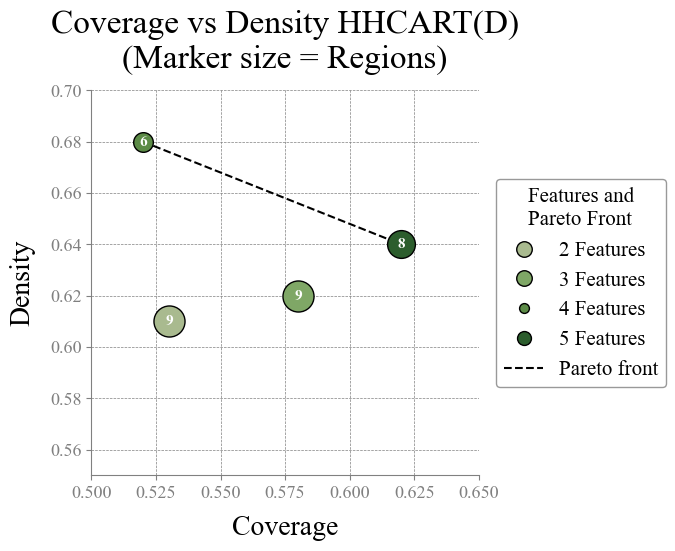

Figure saved: data/comparison/coverage_density_hhcart_d_comparison.png


'data/comparison/coverage_density_hhcart_d_comparison.png'

In [20]:
# Apply Global Plot Settings
apply_global_plot_settings()

# Define Data
df1 = pd.DataFrame({
    'Features': [2, 3, 4, 5],
    'Coverage': [0.53, 0.58, 0.52, 0.62],
    'Density': [0.61, 0.62, 0.68, 0.64],
    'Regions': [9, 9, 6, 8]
})

# Assign a unique color to each feature count
color_map_1 = {
    2: "#A9BA8F",
    3: "#7FA766",
    4: "#5C8B47",
    5: "#2C5D2D"
}
df1['Color'] = df1['Features'].map(color_map_1)

# Scale marker size based on the number of regions
min_size, max_size = 200, 500
region_range = df1['Regions'].max() - df1['Regions'].min()
if region_range == 0:
    df1['Size'] = min_size
else:
    df1['Size'] = min_size + (df1['Regions'] - df1['Regions'].min()) / region_range * (max_size - min_size)

# Sort by size so smaller dots are drawn on top for better visibility
df1 = df1.sort_values(by="Size", ascending=False).reset_index(drop=True)

# Create the Plot
fig, ax = plt.subplots(figsize=(5, 5))

# Plot each point as a scatter point
for i in df1.index:
    x = df1.loc[i, 'Coverage']
    y = df1.loc[i, 'Density']
    ax.scatter(x, y,
               s=df1.loc[i, 'Size'],
               c=df1.loc[i, 'Color'],
               edgecolor='black',
               zorder=10 + i)
    # Annotate with the number of regions
    ax.text(x, y, str(df1.loc[i, 'Regions']),
            ha='center', va='center', fontsize=11, color='white', weight='bold', zorder=100)

# Calculate and Plot
pareto_points = []
for i, row_i in df1.iterrows():
    is_dominated = False
    for j, row_j in df1.iterrows():
        if i == j:
            continue
        if (row_j["Coverage"] >= row_i["Coverage"] and row_j["Density"] >= row_i["Density"] and
           (row_j["Coverage"] > row_i["Coverage"] or row_j["Density"] > row_i["Density"])):
            is_dominated = True
            break
    if not is_dominated:
        pareto_points.append((row_i["Coverage"], row_i["Density"]))

# Plot the Pareto front line behind the points
if len(pareto_points) > 1:
    pareto_points = sorted(pareto_points, key=lambda tup: tup[0])
    pareto_x, pareto_y = zip(*pareto_points)
    ax.plot(pareto_x, pareto_y, linestyle='--', color='black', linewidth=1.5, zorder=2)

# Create Legend
legend_handles = []
used_features = sorted(df1['Features'].unique())
for feat in used_features:
    # Get the size and color for the legend marker
    size = df1[df1['Features'] == feat]['Size'].iloc[0]
    color = df1[df1['Features'] == feat]['Color'].iloc[0]
    legend_handles.append(plt.Line2D([0], [0], marker='o', markersize=(size ** 0.5) / 2,
                                     color='black', markerfacecolor=color,
                                     linestyle='None', label=f"{feat} Features"))

# Add the Pareto front dashed line to the legend
pareto_handle = Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label='Pareto front')
legend_handles.append(pareto_handle)

ax.legend(handles=legend_handles, fontsize=14, title="Features and\nPareto Front", title_fontsize=15, loc='center left', bbox_to_anchor=(1.02, 0.5))

# Set axis limits
ax.set_xlim(0.5, 0.65)
ax.set_ylim(0.55, 0.7)

# Save as a PDF
save_path = "data/comparison/coverage_density_hhcart_d_comparison.pdf"
beautify_plot(ax,
              xlabel="Coverage",
              ylabel="Density",
              title="Coverage vs Density HHCART(D)\n(Marker size = Regions)",
              save_path=save_path,
              show_grid=True)

# Save as a PNG
save_path = "data/comparison/coverage_density_hhcart_d_comparison.png"
beautify_plot(ax,
              xlabel="Coverage",
              ylabel="Density",
              title="Coverage vs Density HHCART(D)\n(Marker size = Regions)",
              save_path=save_path,
              show_grid=True)

save_path

### HHCART D vs Established Methods
The cell below plots the coverage vs density of the 2 best HHCART(D) models with 2 to 5 features, compared to the established methods.

Pareto-optimal points (Coverage, Density):
  - HHCART(D) (4 Features): (0.52, 0.68)
  - CART: (0.66, 0.64)
  - PRIM (Box 5): (0.51, 0.72)
Figure saved: data/comparison/coverage_density_method_comparison.pdf


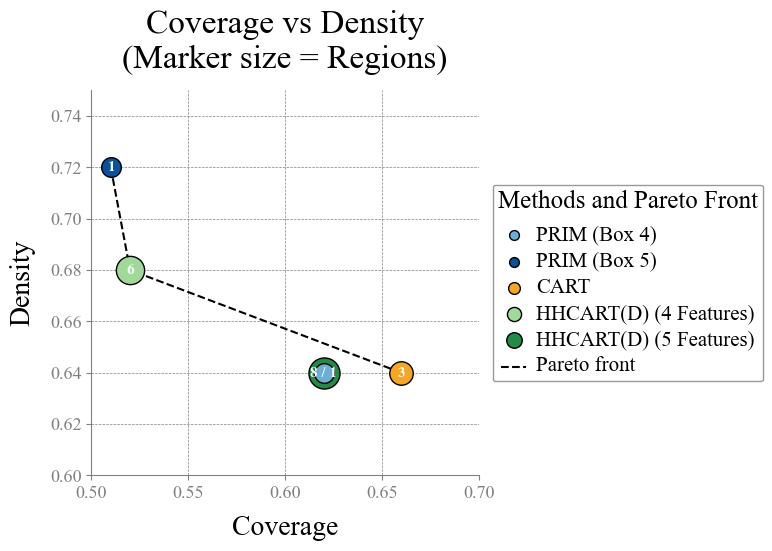

Figure saved: data/comparison/coverage_density_method_comparison.png


'data/comparison/coverage_density_method_comparison.png'

In [23]:
# Apply Global Plot Settings
apply_global_plot_settings()

# Define Data
df2 = pd.DataFrame({
    'Method': [
        "PRIM (Box 4)", "PRIM (Box 5)", "CART",
        "HHCART(D) (4 Features)", "HHCART(D) (5 Features)"
    ],
    'Regions': [1, 1, 3, 6, 8],
    'Coverage': [0.62, 0.51, 0.66, 0.52, 0.62],
    'Density': [0.64, 0.72, 0.64, 0.68, 0.64],
})

# Assign a unique color to each method
color_map_2 = {
    "PRIM (Box 4)": "#6BAED6",
    "PRIM (Box 5)": "#08519C",
    "CART": "#F5A623",
    "HHCART(D) (4 Features)": "#A1D99B",
    "HHCART(D) (5 Features)": "#238B45"
}
df2["Color"] = df2["Method"].map(color_map_2)

# Scale marker size based on the number of regions
min_size, max_size = 200, 500
region_range = df2["Regions"].max() - df2["Regions"].min()
if region_range == 0:
    df2['Size'] = min_size
else:
    df2["Size"] = min_size + (df2["Regions"] - df2["Regions"].min()) / region_range * (max_size - min_size)

# Sort by size so smaller dots are drawn on top for better visibility
df2 = df2.sort_values(by="Size", ascending=False).reset_index(drop=True)

# Create the Plot and Annotate
fig, ax = plt.subplots(figsize=(5, 5))

# Plot each method as a scatter point
for i in df2.index:
    ax.scatter(df2.loc[i, "Coverage"], df2.loc[i, "Density"],
               s=df2.loc[i, "Size"],
               c=df2.loc[i, "Color"],
               edgecolor='black',
               label=df2.loc[i, "Method"],
               zorder=10 + i)

# Smart annotation to merge labels for points that are close together
annotated = set()
threshold = 0.01  # Distance threshold for merging labels

for i in df2.index:
    if i in annotated:
        continue
    x1, y1 = df2.loc[i, 'Coverage'], df2.loc[i, 'Density']
    region1 = str(df2.loc[i, 'Regions'])
    merged = False

    # Check for a second close point to merge with
    for j in df2.index:
        if j == i or j in annotated:
            continue
        x2, y2 = df2.loc[j, 'Coverage'], df2.loc[j, 'Density']
        dist = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
        if dist < threshold:
            # If close, merge the region labels
            region2 = str(df2.loc[j, 'Regions'])
            merged_label = f"{region1} / {region2}"
            mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
            ax.text(mid_x, mid_y, merged_label, ha='center', va='center',
                    fontsize=11, weight='bold', color='white', zorder=100)
            annotated.update([i, j])
            merged = True
            break
    
    # If not merged, annotate the single point
    if not merged:
        ax.text(x1, y1, region1, ha='center', va='center',
                fontsize=11, weight='bold', color='white', zorder=100)
        annotated.add(i)

# Calculate and Plot Pareto Frontier
pareto_points = []
for i, row_i in df2.iterrows():
    is_dominated = False
    for j, row_j in df2.iterrows():
        if i == j:
            continue
        if (row_j["Coverage"] >= row_i["Coverage"] and row_j["Density"] >= row_i["Density"] and
           (row_j["Coverage"] > row_i["Coverage"] or row_j["Density"] > row_i["Density"])):
            is_dominated = True
            break
    if not is_dominated:
        pareto_points.append((row_i["Coverage"], row_i["Density"]))

# Print the Pareto-optimal methods to the console
print("Pareto-optimal points (Coverage, Density):")
for (x, y) in pareto_points:
    match = df2[(df2["Coverage"] == x) & (df2["Density"] == y)]
    for _, row in match.iterrows():
        print(f"  - {row['Method']}: ({x:.2f}, {y:.2f})")

# Plot the Pareto front line
if len(pareto_points) > 1:
    pareto_points = sorted(pareto_points, key=lambda tup: tup[0])
    pareto_x, pareto_y = zip(*pareto_points)
    ax.plot(pareto_x, pareto_y, linestyle='--', color='black', linewidth=1.5,
            label='Pareto front', zorder=2)

# Define desired legend order
legend_order = [
    "PRIM (Box 4)", "PRIM (Box 5)", "CART",
    "HHCART(D) (4 Features)", "HHCART(D) (5 Features)"
]

legend_handles = []
for method_name in legend_order:
    row = df2[df2["Method"] == method_name].iloc[0]
    legend_handles.append(
        Line2D([0], [0], marker='o', markersize=(row["Size"] ** 0.5) / 2,
               color='black', markerfacecolor=row["Color"],
               linestyle='None', label=method_name)
    )

# Add the Pareto front to the legend
pareto_handle = Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label='Pareto front')
legend_handles.append(pareto_handle)

ax.legend(handles=legend_handles, fontsize=9, title="Methods and Pareto Front", title_fontsize=18, loc='center left', bbox_to_anchor=(1.02, 0.5))

# Set axis limits
ax.set_xlim(0.5, 0.7)
ax.set_ylim(0.6, 0.75)

# Save as a PDF
save_path = "data/comparison/coverage_density_method_comparison.pdf"
beautify_plot(ax,
              xlabel="Coverage",
              ylabel="Density",
              title="Coverage vs Density\n(Marker size = Regions)",
              save_path=save_path,
              show_grid=True)

# Save as PNG
save_path = "data/comparison/coverage_density_method_comparison.png"
beautify_plot(ax,
              xlabel="Coverage",
              ylabel="Density",
              title="Coverage vs Density\n(Marker size = Regions)",
              save_path=save_path,
              show_grid=True)

save_path

### All HHCART D runs vs Established Methods
The cell below plots the coverage vs density of all HHCART(D) models with 2 to 5 features, compared to the established methods.

Pareto-optimal points (Coverage, Density):
  - HHCART(D) (4 Features): (0.52, 0.68)
  - CART: (0.66, 0.64)
  - PRIM (Box 5): (0.51, 0.72)
Figure saved: data/comparison/coverage_density_combined_comparison.pdf


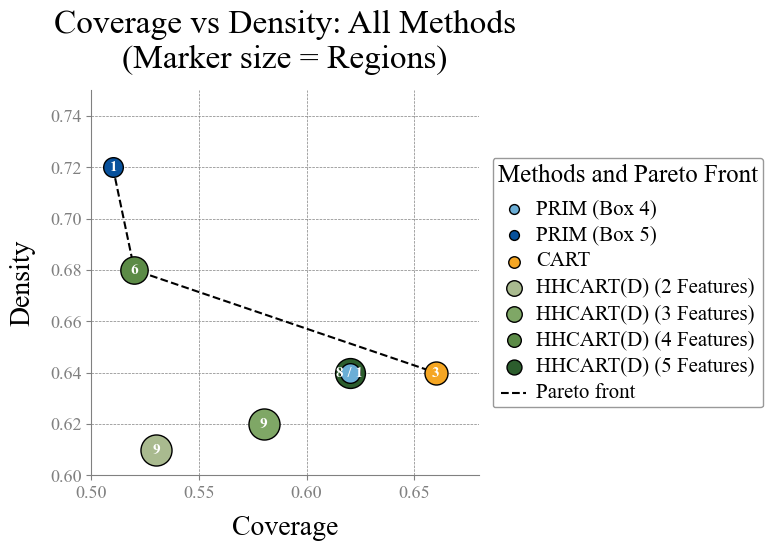

Figure saved: data/comparison/coverage_density_combined_comparison.png


'data/comparison/coverage_density_method_comparison.png'

In [12]:
# Data for HHCART(D) models (formerly df1)
df1 = pd.DataFrame({
    'Method': [
        "HHCART(D) (2 Features)", "HHCART(D) (3 Features)",
        "HHCART(D) (4 Features)", "HHCART(D) (5 Features)"
    ],
    'Coverage': [0.53, 0.58, 0.52, 0.62],
    'Density': [0.61, 0.62, 0.68, 0.64],
    'Regions': [9, 9, 6, 8]
})

# Data for comparison with other methods (formerly df2)
df2 = pd.DataFrame({
    'Method': [
        "PRIM (Box 4)", "PRIM (Box 5)", "CART",
        "HHCART(D) (4 Features)", "HHCART(D) (5 Features)"
    ],
    'Coverage': [0.62, 0.51, 0.66, 0.52, 0.62],
    'Density': [0.64, 0.72, 0.64, 0.68, 0.64],
    'Regions': [1, 1, 3, 6, 8]
})

# Combine the two dataframes into a new, single dataframe
# and remove duplicates to create a single source of truth.
df_combined = pd.concat([df1, df2]).drop_duplicates(subset=['Method']).reset_index(drop=True)

# A single, harmonized color map for all methods
color_map = {
    # HHCART colors for visual progression
    "HHCART(D) (2 Features)": "#A9BA8F",
    "HHCART(D) (3 Features)": "#7FA766",
    "HHCART(D) (4 Features)": "#5C8B47",
    "HHCART(D) (5 Features)": "#2C5D2D",
    # Colors for other established methods
    "PRIM (Box 4)": "#6BAED6",
    "PRIM (Box 5)": "#08519C",
    "CART": "#F5A623",
}
df_combined['Color'] = df_combined['Method'].map(color_map)

# Scale marker size based on the number of regions for the ENTIRE dataset
min_size, max_size = 200, 500
region_range = df_combined['Regions'].max() - df_combined['Regions'].min()
# Prevent division by zero if all points have the same number of regions
if region_range == 0:
    df_combined['Size'] = min_size
else:
    df_combined['Size'] = min_size + (df_combined['Regions'] - df_combined['Regions'].min()) / region_range * (max_size - min_size)

# Sort so smaller dots (fewer regions) are drawn on top for better visibility
df_combined = df_combined.sort_values(by="Size", ascending=False).reset_index(drop=True)

# Apply global plot settings for a consistent style
apply_global_plot_settings()

fig, ax = plt.subplots(figsize=(5, 5)) # Slightly larger for better readability

# Plot the data points
for i in df_combined.index:
    ax.scatter(df_combined.loc[i, 'Coverage'], df_combined.loc[i, 'Density'],
               s=df_combined.loc[i, 'Size'],
               c=df_combined.loc[i, 'Color'],
               edgecolor='black',
               label=df_combined.loc[i, 'Method'],
               zorder=10 + i)

# Annotation to group labels for points that are close together
annotated = set()
threshold = 0.015  # Distance threshold for merging labels

for i in df_combined.index:
    if i in annotated:
        continue
    x1, y1 = df_combined.loc[i, 'Coverage'], df_combined.loc[i, 'Density']
    region1 = str(df_combined.loc[i, 'Regions'])
    merged = False

    # Check for a nearby point to merge with
    for j in df_combined.index:
        if j == i or j in annotated:
            continue
        x2, y2 = df_combined.loc[j, 'Coverage'], df_combined.loc[j, 'Density']
        dist = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
        if dist < threshold:
            # Merge the region labels
            region2 = str(df_combined.loc[j, 'Regions'])
            merged_label = f"{region1} / {region2}"
            mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
            ax.text(mid_x, mid_y, merged_label, ha='center', va='center',
                    fontsize=11, weight='bold', color='white', zorder=100)
            annotated.update([i, j])
            merged = True
            break
            
    # If not merged, annotate the single point
    if not merged:
        ax.text(x1, y1, region1, ha='center', va='center',
                fontsize=11, weight='bold', color='white', zorder=100)
        annotated.add(i)

# Calculate and Plot Global Pareto Frontier
pareto_points = []
for i, row_i in df_combined.iterrows():
    is_dominated = False
    for j, row_j in df_combined.iterrows():
        if i == j:
            continue
        # A point is dominated if another point is better or equal on both axes,
        # and strictly better on at least one axis.
        if (
            row_j["Coverage"] >= row_i["Coverage"]
            and row_j["Density"] >= row_i["Density"]
            and (row_j["Coverage"] > row_i["Coverage"] or row_j["Density"] > row_i["Density"])
        ):
            is_dominated = True
            break
    if not is_dominated:
        pareto_points.append((row_i["Coverage"], row_i["Density"]))

# Print the Pareto-optimal methods to the console
print("Pareto-optimal points (Coverage, Density):")
for (x, y) in pareto_points:
    match = df_combined[(df_combined["Coverage"] == x) & (df_combined["Density"] == y)]
    for _, row in match.iterrows():
        print(f"  - {row['Method']}: ({x:.2f}, {y:.2f})")

# Plot the Pareto front line behind the points
if len(pareto_points) > 1:
    pareto_points = sorted(pareto_points, key=lambda tup: tup[0])
    pareto_x, pareto_y = zip(*pareto_points)
    ax.plot(pareto_x, pareto_y, linestyle='--', color='black', linewidth=1.5,
            label='Pareto front', zorder=2)

# Create a legend in desired order: PRIM, CART, HHCART, then Pareto front
legend_order = [
    "PRIM (Box 4)", "PRIM (Box 5)", "CART",
    "HHCART(D) (2 Features)", "HHCART(D) (3 Features)",
    "HHCART(D) (4 Features)", "HHCART(D) (5 Features)"
]

legend_handles = []
for method_name in legend_order:
    row = df_combined[df_combined['Method'] == method_name].iloc[0]
    legend_handles.append(
        Line2D([0], [0], marker='o', markersize=(row['Size'] ** 0.5) / 2,
               color='black', markerfacecolor=row['Color'],
               linestyle='None', label=method_name)
    )

# Add Pareto front last
pareto_handle = Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label='Pareto front')
legend_handles.append(pareto_handle)

ax.legend(handles=legend_handles, fontsize=9, title="Methods and Pareto Front", title_fontsize=18,
          loc='center left', bbox_to_anchor=(1.02, 0.5))

# Set axis limits
ax.set_xlim(0.5, 0.68)
ax.set_ylim(0.6, 0.75)

# Save as PDF
save_path_pdf = "data/comparison/coverage_density_combined_comparison.pdf"
beautify_plot(ax,
              xlabel="Coverage",
              ylabel="Density",
              title="Coverage vs Density: All Methods\n(Marker size = Regions)",
              save_path=save_path_pdf,
              show_grid=True)

# Save as PNG
save_path_png = "data/comparison/coverage_density_combined_comparison.png"
beautify_plot(ax,
              xlabel="Coverage",
              ylabel="Density",
              title="Coverage vs Density: All Methods\n(Marker size = Regions)",
              save_path=save_path_png,
              show_grid=True)

save_path